In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [8]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)

#Higher the value of gamma, will try to exact fit the as per training data set  and cause over-fitting problem.

#The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 
#For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better
#job of getting all the training points classified correctly. 
#Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, 
#even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, 
#often even if your training data is linearly separable.

In [9]:
y_pred=svc.predict(X_test)

In [10]:
svc.score(X_test,y_test)

0.8157894736842105

In [11]:
# create a mesh to plot in
x_min  = X[:, 0].min() - 1
x_min
x_max =X[:, 0].max() + 1

In [12]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
h

np.float64(0.026969696969696973)

In [13]:
print(h)

0.026969696969696973


In [14]:
#The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

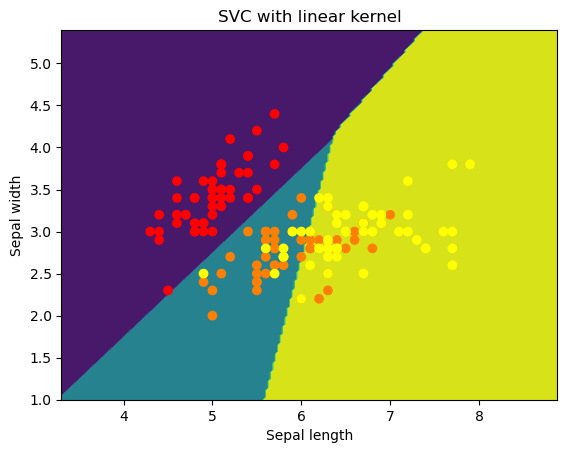

In [15]:
plt.subplot(1, 1, 1) ##the figure has 1 row, 1 column, and this plot is the first plot.
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel will flatten and then predicting
Z = Z.reshape(xx.shape) # reshape z in shape of xx
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.autumn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [16]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X_train, y_train)

In [17]:
y_pred_rbf=svc_rbf.predict(X_test)

In [18]:
svc_rbf.score(X_test,y_test)

0.8157894736842105

In [19]:
# create a mesh to plot in
x_min  = X[:, 0].min() - 1
x_min
x_max =X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100

In [20]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

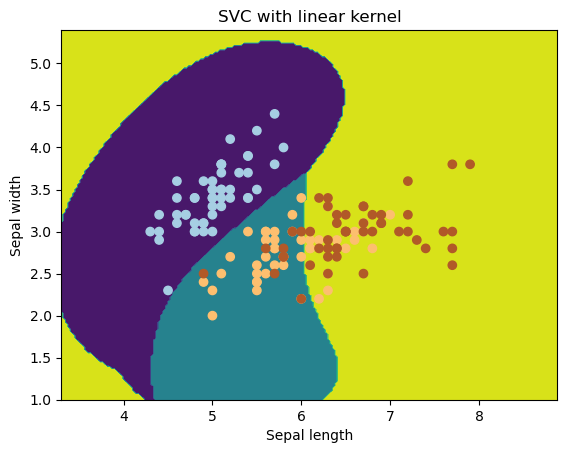

In [21]:
plt.subplot(1, 1, 1)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()